In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
plt.rcParams['figure.figsize'] = (16, 4)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer

from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [2]:
#read files from previous jupyter

df_area_1 = pd.read_pickle('data/clean/df_area_1.pickle') #(12192, 1)
df_area_2 = pd.read_pickle('data/clean/df_area_2.pickle') #(15480, 1)
df_area_3 = pd.read_pickle('data/clean/df_area_3.pickle') #(17160, 1)

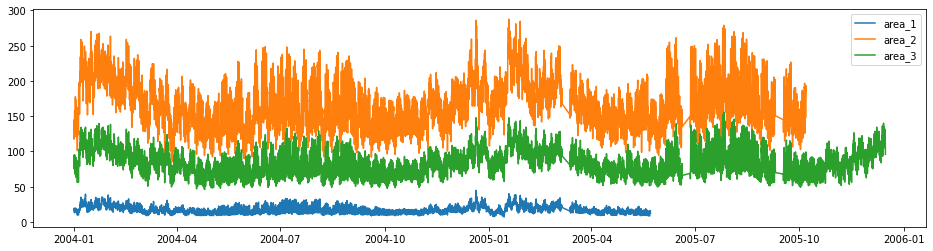

In [3]:
#plot
plt.plot(df_area_1, label='area_1')
plt.plot(df_area_2, label='area_2')
plt.plot(df_area_3, label='area_3')
plt.legend();

In [18]:
#area_1

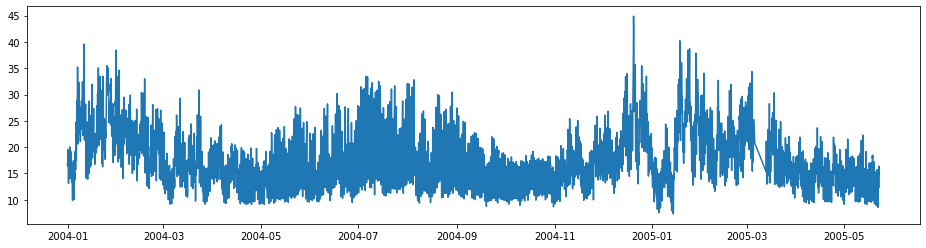

In [4]:
plt.plot(df_area_1, label='area_1')

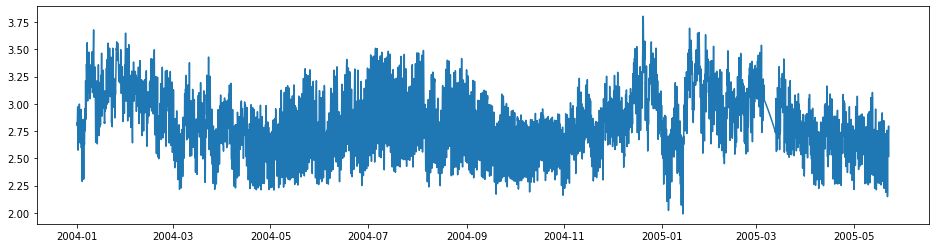

In [5]:
df_area_1_log = np.log(df_area_1)
plt.plot(df_area_1_log, label='area_1')

In [11]:
df_area_1_log_train = df_area_1_log[:-24*7]
df_area_1_log_test = df_area_1_log[-24*7:]

df_area_1_train = df_area_1[:-24*7]
df_area_1_test = df_area_1[-24*7:]

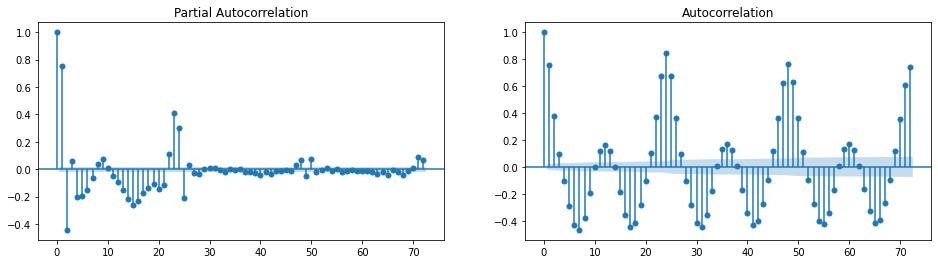

In [9]:
fig, ax = plt.subplots(1,2)
plot_pacf(df_area_1_log_train.diff().dropna(), alpha=.05, lags=72, ax=ax[0], method='ols')  
plot_acf(df_area_1_log_train.diff().dropna(), alpha=.05, lags=72, ax=ax[1])  
plt.show()

In [13]:
#small train set to run faster
df_area_1_train_s = df_area_1[-24*45:-24*7]
df_area_1_test_s = df_area_1[-24*7:]

df_area_1_train_s.shape

(912, 1)

In [15]:
sarimax_a1 = pm.AutoARIMA(trace=True, supress_warnings=True, m=24)
sarimax_a1.fit(df_area_1_train_s)

#sarimax_a1_forecast = sarimax_a1.predict(24)
# mean_absolute_error(np.exp(sarimax_a1_forecast),np.exp(df_area_1_log_test))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=26.88 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=4392.787, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=8.71 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=2880.494, Time=2.64 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=7471.988, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=3310.095, Time=0.30 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,0,1)(1,0,1)[24] intercept   : AIC=2675.680, Time=13.63 sec
 ARIMA(0,0,1)(1,0,0)[24] intercept   : AIC=2684.244, Time=6.59 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,0,1)(2,0,1)[24] intercept   : AIC=inf, Time=50.52 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,0,1)(1,0,2)[24] intercept   : AIC=2749.996, Time=81.77 sec
 ARIMA(0,0,1)(0,0,2)[24] intercept   : AIC=2800.769, Time=18.46 sec
 ARIMA(0,0,1)(2,0,0)[24] intercept   : AIC=3212.670, Time=35.50 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,0,1)(2,0,2)[24] intercept   : AIC=2681.999, Time=73.60 sec
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=3771.516, Time=9.20 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=1361.352, Time=13.26 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(1,0,1)(0,0,1)[24] intercept   : AIC=1749.066, Time=5.73 sec
 ARIMA(1,0,1)(1,0,0)[24] intercept   : AIC=1404.480, Time=11.71 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,1)(2,0,1)[24] intercept   : AIC=inf, Time=56.71 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,1)(1,0,2)[24] intercept   : AIC=inf, Time=60.14 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=2191.472, Time=0.63 sec
 ARIMA(1,0,1)(0,0,2)[24] intercept   : AIC=1576.678, Time=27.92 sec
 ARIMA(1,0,1)(2,0,0)[24] intercept   : AIC=1387.688, Time=70.27 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,1)(2,0,2)[24] intercept   : AIC=inf, Time=92.23 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=1751.894, Time=11.80 sec
 ARIMA(2,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=12.91 sec
 ARIMA(1,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=17.95 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,0,2)(1,0,1)[24] intercept   : AIC=1983.970, Time=19.15 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=13.75 sec
 ARIMA(1,0,1)(1,0,1)[24]             : AIC=1378.281, Time=9.00 sec

Best model:  ARIMA(1,0,1)(1,0,1)[24] intercept
Total fit time: 751.092 seconds


AutoARIMA(m=24, trace=True)

In [17]:
sarimax_pipeline_a1 = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=24
                          )
    )
])

sarimax_pipeline_a1.fit(df_area_1_train_s)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=-2649.989, Time=28.10 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=450.359, Time=0.22 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=13.09 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-1107.150, Time=3.79 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=4843.947, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[24] intercept   : AIC=-2442.530, Time=15.94 sec
 ARIMA(2,0,2)(1,0,0)[24] intercept   : AIC=-2472.137, Time=21.71 sec
 ARIMA(2,0,2)(2,0,1)[24] intercept   : AIC=-1248.674, Time=60.31 sec
 ARIMA(2,0,2)(1,0,2)[24] intercept   : AIC=inf, Time=99.75 sec
 ARIMA(2,0,2)(0,0,0)[24] intercept   : AIC=-2100.191, Time=2.47 sec
 ARIMA(2,0,2)(0,0,2)[24] intercept   : AIC=-2569.398, Time=67.47 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:437: ModelFitWarning: Error fitting  ARIMA(2,0,2)(2,0,0)[24] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py", line 421, in _fit_candidate_model
    fit.fit(x, exogenous=xreg, **fit_params)
  File "/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/pmdarima/arima/arima.py", line 472, in fit
    self._fit(y, exogenous, **fit_args)
  File "/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/pmdarima/arima/arima.py", line 395, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/pmdarima/arima/arima.py", line 389, in _fit_wrapper
    **fit_args)
  File "/home/fernandam

 ARIMA(2,0,2)(2,0,0)[24] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,2)(2,0,2)[24] intercept   : AIC=inf, Time=125.73 sec
 ARIMA(1,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=22.56 sec
 ARIMA(2,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=23.10 sec
 ARIMA(3,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=13.87 sec
 ARIMA(2,0,3)(1,0,1)[24] intercept   : AIC=inf, Time=24.58 sec
 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=13.14 sec
 ARIMA(1,0,3)(1,0,1)[24] intercept   : AIC=inf, Time=23.08 sec
 ARIMA(3,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=23.07 sec
 ARIMA(3,0,3)(1,0,1)[24] intercept   : AIC=-2403.060, Time=27.52 sec
 ARIMA(2,0,2)(1,0,1)[24]             : AIC=inf, Time=13.91 sec

Best model:  ARIMA(2,0,2)(1,0,1)[24] intercept
Total fit time: 648.775 seconds


Pipeline(steps=[('boxcox', BoxCoxEndogTransformer(lmbda2=1e-06)),
                ('arima', AutoARIMA(m=24, suppress_warnings=True, trace=True))])

In [18]:
pred_a1 = sarimax_pipeline_a1.predict(24*7)

mean_absolute_error(sarimax_pipeline_a1.predict(24*7),df_area_1_test_s)

0.9283486958693858

In [21]:
prediction1 = pd.Series(pred_a1, index=df_area_1_test_s.index)
prediction1

date
2005-05-16 00:00:00    10.851915
2005-05-16 01:00:00     9.886460
2005-05-16 02:00:00     9.403651
2005-05-16 03:00:00     9.219305
2005-05-16 04:00:00     9.282299
                         ...    
2005-05-22 19:00:00    16.096501
2005-05-22 20:00:00    16.271520
2005-05-22 21:00:00    16.014721
2005-05-22 22:00:00    14.602581
2005-05-22 23:00:00    12.622465
Length: 168, dtype: float64

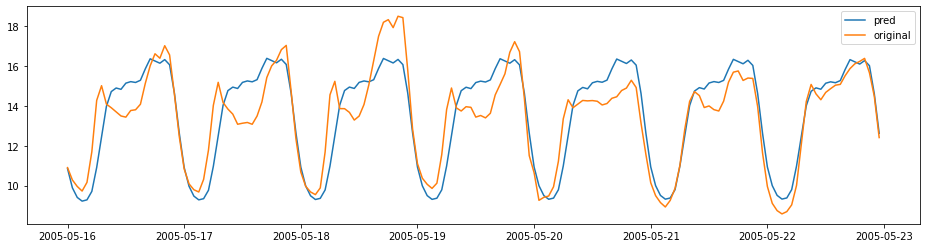

In [22]:
plt.plot(prediction1, label='pred')
plt.plot(df_area_1_test_s, label='original')
plt.legend();

In [28]:
sarimax_pipeline_a1_full = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=24
                          )
    )
])

sarimax_pipeline_a1_full.fit(df_area_1_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-63319.318, Time=187.52 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-41815.593, Time=2.08 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-61148.708, Time=73.21 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-56566.384, Time=90.26 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-41817.592, Time=0.73 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-58613.962, Time=206.06 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-61871.999, Time=175.95 sec
 ARIMA(2,1,2)(2,0,1)[24] intercept   : AIC=-63170.248, Time=766.89 sec
 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=-63892.468, Time=729.05 sec
 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=-59983.717, Time=508.81 sec


KeyboardInterrupt: 

In [31]:
def build_target(series_, number_of_periods_ahead):
    """ 
    takes a series, turned it into a dataframe, and adds a new column called target
    This column is the input series, lagged number_of_periods_ahead into the future
    """
    
    # make a copy 
    series_ = series_.copy()
    series_.name = 'observed_values'
    
    # make a dataframe from the series
    df_ = pd.DataFrame(series_)
    
    # the target column will be the input series, lagged into the future
    df_['target'] = series_.shift(-number_of_periods_ahead)
    return df_


def build_some_features(df_, num_periods_lagged): 
    """
    Builds some features by calculating differences between periods  
    """
    # make a copy 
    df_ = df_.copy()
        
    # for a few values, get the lags  
    for i in range(1, num_periods_lagged+1):
        # make a new feature, with the lags in the observed values column
        df_['lagged_%s' % str(i)] = df_['observed_values'].shift(i)
        
    return df_

def separate_last_day(df_):
    
    """
    takes a dataset which has the target and features built 
    and separates it into the last day
    """
    # take the last period 
    last_period = df_.iloc[-1]
    
    # the last period is now a series, so it's name will be the timestamp
    training_data = df_.loc[df_.index < last_period.name]

    return last_period, training_data

def separate_train_and_test_set(last_period_, training_data_, target='target'): 
    
    """ 
    separates training and test set (clue was in the name, really... )
    Ok, we were lazy and left the target hardcoded as 'target'. Shame on us. 
    """
    
    # anything that isn't a target is a feature 
    features = [feature for feature in training_data_.columns if feature != target]
    
    # adding a sneaky little dropna to avoid the missing data problem above 
    X_train = training_data_.dropna()[features]
    y_train = training_data_.dropna()[target]
    
    X_last_period = last_period_[features]
    
    return X_train, y_train, X_last_period


def prepare_for_prediction(series_, number_of_periods_ahead, num_periods_lagged):
    
    """ 
    Wrapper to go from the original series to X_train, y_train, X_last_period 
    
    """
    
    # build the target 
    data_with_target = build_target(series_, 
                                    number_of_periods_ahead)
    
    # build the features 
    data_with_target_and_features = build_some_features(data_with_target, 
                                                        num_periods_lagged=num_periods_lagged)
    # separate train and test data 
    last_period, training_data = separate_last_day(data_with_target_and_features)

    # separate X_train, y_train, and X_test 
    X_train, y_train, X_last_period = separate_train_and_test_set(last_period, 
                                                           training_data, 
                                                           target='target')
    
    # return ALL OF THE THINGS! (well, actually just the ones we need)
    return X_train, y_train, X_last_period 


def predict_period_n(series_, model, number_of_periods_ahead, num_periods_lagged): 
    
        X_train, y_train, X_last_period = prepare_for_prediction(series_, 
                                                             number_of_periods_ahead, 
                                                             num_periods_lagged)
        
        model.fit(X_train, y_train)
        return model.predict(X_last_period.values.reshape(1, -1))

def predict_n_periods(series_, n_periods, model, num_periods_lagged): 
    predictions = []

    for period_ahead in range(1, n_periods+1):
        pred = predict_period_n(series_=series_, 
                                model=model, 
                                number_of_periods_ahead=period_ahead, 
                                num_periods_lagged=num_periods_lagged)
        
        predictions.append(pred[0])
        
    return predictions

In [32]:
df_area_1_train = df_area_1_train.rename(mapper = {"value": 'observed_values'}, axis = "columns")
df_area_1_test = df_area_1_test.rename(mapper = {"value": 'observed_values'}, axis = "columns")

predictions1 = predict_n_periods(series_=df_area_1_train, 
                  n_periods=len(df_area_1_test), 
                  model=LinearRegression(), 
                  num_periods_lagged=24)

In [33]:
len(predictions1)

168

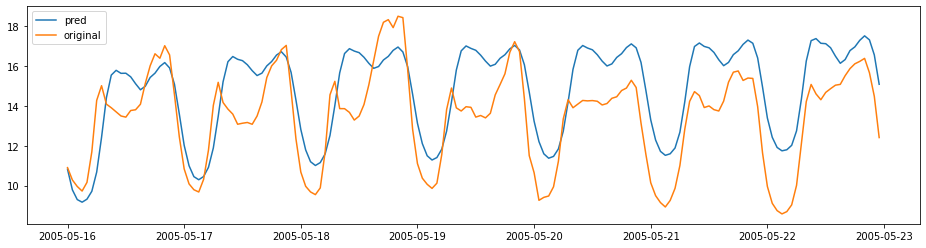

In [34]:
plt.plot(pd.Series(predictions1, index=df_area_1_test.index), label='pred')
plt.plot(df_area_1_test, label='original')
plt.legend();

In [35]:
mean_absolute_error(predictions1,df_area_1_test)

1.783427153656169